In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import os
from collection import Cooking
import random

RAW_DATA_DIR = 'D:/EndToEndLearningRawData/data_raw/'
COOKED_DATA_DIR = 'D:/EndToEndLearningRawData/data_cooked/'

DATA_FOLDERS = ['normal_1', 'normal_2', 'normal_3', 'normal_4', 'normal_5', 'normal_6', 'swerve_1', 'swerve_2', 'swerve_3']

FIGURE_SIZE = (10,10)

ImportError: DLL load failed: The specified procedure could not be found.

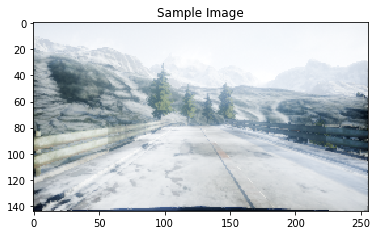

In [2]:
#reading the data and convert to pandas type
sample_tsv_path = os.path.join(RAW_DATA_DIR,'normal_1/airsim_rec.txt')
sample_tsv = pd.read_csv(sample_tsv_path, sep='\t')
sample_tsv.head()

#reading the image
sample_image_path = os.path.join(RAW_DATA_DIR, 'normal_1/images/img_0.png')
sample_image = Image.open(sample_image_path) #Image to show data
plt.title('Sample Image')
plt.imshow(sample_image)
plt.show()


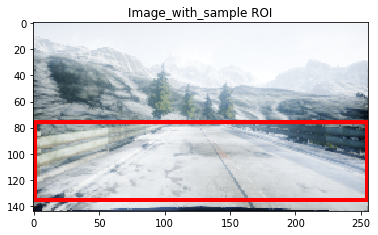

In [3]:

#draw a rectangle on the copied image
sample_image_roi = sample_image.copy()

fillcolor=(255,0,0)
draw = ImageDraw.Draw(sample_image_roi)
points = [(1,76), (1,135), (255,135), (255,76)]
for i in range(0, len(points), 1):
    draw.line([points[i], points[(i+1)%len(points)]], fill=fillcolor, width=3)
del draw
plt.title('Image_with_sample ROI')
plt.imshow(sample_image_roi)
plt.show()


In [7]:
#get data from each folders.
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]

dataframes = []
for folder in full_path_raw_folders:
    current_dataframe = pd.read_csv(os.path.join(folder, 'airsim_rec.txt'), sep='\t')
    current_dataframe['Folder'] = folder
    dataframes.append(current_dataframe)

dataset = pd.concat(dataframes, axis=0)
print('Number of data points: {0}'.format(dataset.shape[0]))
dataset.head()

Number of data points: 46738


,Timestamp,Speed (kmph),Throttle,Steering,Brake,Gear,ImageName,Folder
0,93683464,0,0.0,0.000000,0.0,N,img_0.png,D:/EndToEndLearningRawData/data_raw/normal_1
1,93689595,0,0.0,0.000000,0.0,N,img_1.png,D:/EndToEndLearningRawData/data_raw/normal_1
2,93689624,0,0.0,-0.035522,0.0,N,img_2.png,D:/EndToEndLearningRawData/data_raw/normal_1
3,93689624,0,0.0,-0.035522,0.0,N,img_3.png,D:/EndToEndLearningRawData/data_raw/normal_1
4,93689624,0,0.0,-0.035522,0.0,N,img_4.png,D:/EndToEndLearningRawData/data_raw/normal_1


In [8]:
min_index = 100
max_index = 1100
steering_angles_normal_1 = dataset[dataset['Folder'].apply(lambda v: 'normal_1' in v)]['Steering'][min_index:max_index]
steering_angles_swerve_1 = dataset[dataset['Folder'].apply(lambda v: 'swerve_1' in v)]['Steering'][min_index:max_index]

plot_index = [i for i in range(min_index, max_index, 1)]
print('Normal')
print(steering_angles_normal_1, '\n')
print('Swerve')
print(steering_angles_swerve_1, '\n')
print('PlotIndex')
print(plot_index)

Normal
100     0.017874
101     0.015880
102     0.013886
103     0.009939
104     0.009939
105     0.009939
106     0.005910
107     0.005910
108     0.005910
109     0.007945
110     0.007945
111     0.007945
112     0.009939
113     0.009939
114     0.009939
115     0.009939
116     0.017874
117     0.017874
118     0.023855
119     0.033784
120     0.039766
121     0.041719
122     0.041719
123     0.041719
124     0.041719
125     0.041719
126     0.041719
127     0.041719
128     0.041719
129     0.043713
          ...   
1070    0.043713
1071    0.049694
1072    0.053641
1073    0.057629
1074    0.057629
1075    0.061617
1076    0.061617
1077    0.059623
1078    0.057629
1079    0.057629
1080    0.057629
1081    0.059623
1082    0.061617
1083    0.063611
1084    0.063611
1085    0.065605
1086    0.065605
1087    0.065605
1088    0.065605
1089    0.065605
1090    0.065605
1091    0.069552
1092    0.073539
1093    0.077487
1094    0.081515
1095    0.081515
1096    0.081515
1097   

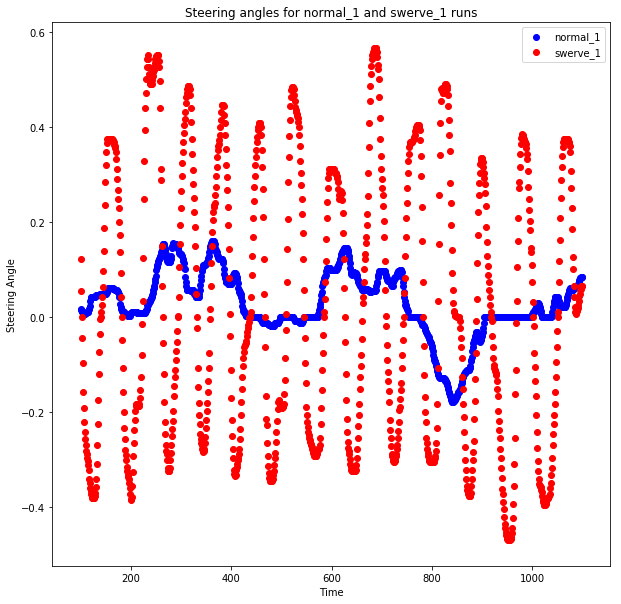

In [9]:
fig = plt.figure(figsize=FIGURE_SIZE)
ax1 = fig.add_subplot(111)

ax1.scatter(plot_index, steering_angles_normal_1, c='b', marker='o', label='normal_1')
ax1.scatter(plot_index, steering_angles_swerve_1, c='r', marker='o', label='swerve_1')
plt.legend(loc='upper_left')
plt.title('Steering angles for normal_1 and swerve_1 runs')
plt.xlabel('Time')
plt.ylabel('Steering Angle')
plt.show()

In [10]:
dataset['Is Swerve'] = dataset.apply(lambda r: 'swerve' in r['Folder'], axis=1)
grouped = dataset.groupby(by=['Is Swerve']).size().reset_index()
print(grouped)

   Is Swerve      0
0      False  34813
1       True  11925


In [11]:
grouped.columns = ['Is Swerve', 'Count']
print(grouped['Count'])
print(grouped.columns)

0    34813
1    11925
Name: Count, dtype: int64
Index(['Is Swerve', 'Count'], dtype='object')


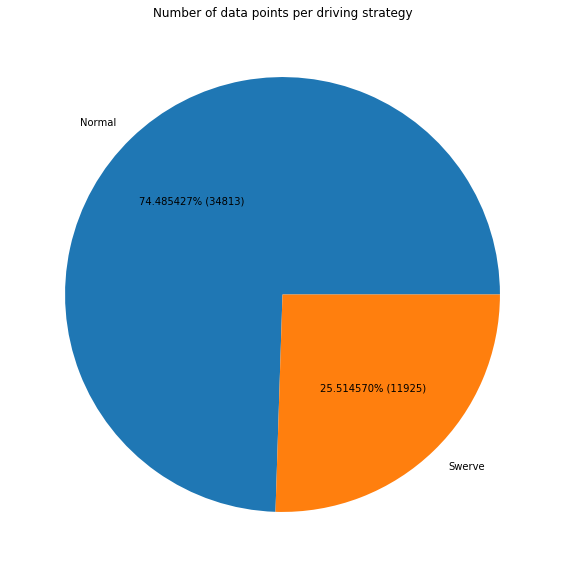

In [12]:
def make_autopct(values):
    def my_autopct(percent):
        total = sum(values)
        val = int(round(percent*total/100.0))
        return '{0:2f}% ({1:d})'.format(percent, val)
    return my_autopct
pie_labels = ['Normal', 'Swerve']
fig, ax = plt.subplots(figsize=FIGURE_SIZE)
ax.pie(grouped['Count'], labels=pie_labels, autopct = make_autopct(grouped['Count']))
plt.title('Number of data points per driving strategy')
plt.show()
       

[ 0.        0.       -0.035522 ...  0.007945  0.007945  0.007945]


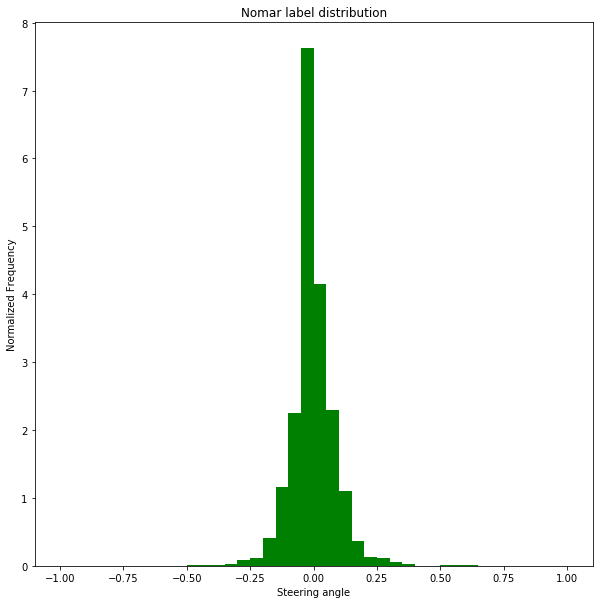

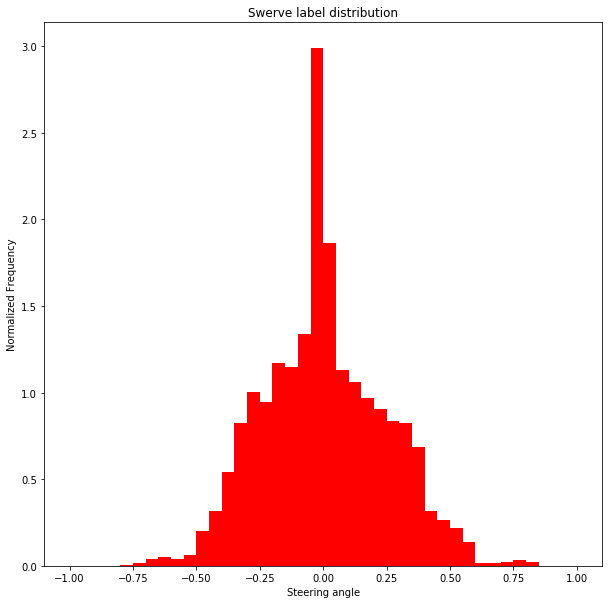

In [14]:
bins = np.arange(-1, 1.05, 0.05)
normal_labels = dataset[dataset['Is Swerve'] == False]['Steering']
swerve_labels = dataset[dataset['Is Swerve'] == True]['Steering']
print(normal_labels.values)
def steering_histogram(hist_labels, title, color):
    plt.figure(figsize=FIGURE_SIZE)
    n, b, p = plt.hist(hist_labels.values, bins, normed=1, facecolor=color)
    plt.xlabel('Steering angle')
    plt.ylabel('Normalized Frequency')
    plt.title(title)
    plt.show()
steering_histogram(normal_labels, 'Nomar label distribution', 'g')
steering_histogram(swerve_labels, 'Swerve label distribution', 'r')

In [15]:
train_eval_test_split = [0.7, 0.2, 0.1]
full_path_raw_folders = [os.path.join(RAW_DATA_DIR, f) for f in DATA_FOLDERS]
Cooking.cook(full_path_raw_folders, COOKED_DATA_DIR, train_eval_test_split)

Reading data from D:/EndToEndLearningRawData/data_raw/normal_1...
Reading data from D:/EndToEndLearningRawData/data_raw/normal_2...
Reading data from D:/EndToEndLearningRawData/data_raw/normal_3...
Reading data from D:/EndToEndLearningRawData/data_raw/normal_4...
Reading data from D:/EndToEndLearningRawData/data_raw/normal_5...
Reading data from D:/EndToEndLearningRawData/data_raw/normal_6...
Reading data from D:/EndToEndLearningRawData/data_raw/swerve_1...
Reading data from D:/EndToEndLearningRawData/data_raw/swerve_2...
Reading data from D:/EndToEndLearningRawData/data_raw/swerve_3...
Processing D:/EndToEndLearningRawData/data_cooked/train.h5...
Finished saving D:/EndToEndLearningRawData/data_cooked/train.h5.
Processing D:/EndToEndLearningRawData/data_cooked/eval.h5...
Finished saving D:/EndToEndLearningRawData/data_cooked/eval.h5.
Processing D:/EndToEndLearningRawData/data_cooked/test.h5...
Finished saving D:/EndToEndLearningRawData/data_cooked/test.h5.
